In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense,Flatten,Conv2D,AveragePooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

ValueError: num must be an integer with 1 <= num <= 9, not 10

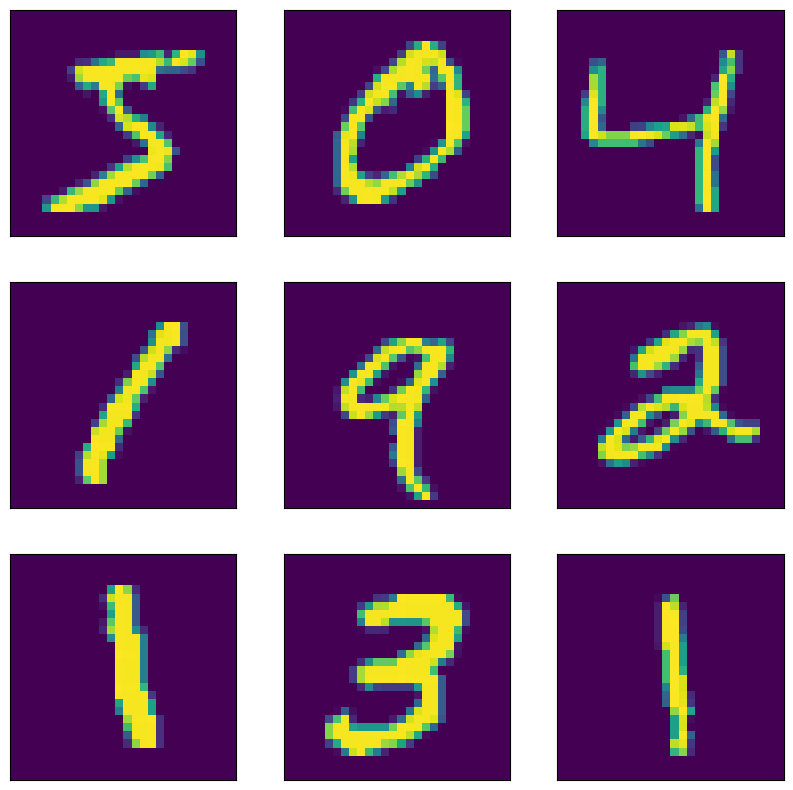

In [12]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])

Lenet-5 takes only input as images with maximum size of (32x32) with 1 channel. But in this dataset, we dont have any channels mentioned in the shape. So, we add a channel of 1 to the shape of the dataset

In [14]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [15]:
#Normalization
X_train = X_train/255
X_test = X_test/255

In [16]:
#one_hot_encoding
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
model=Sequential()

model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)              

In [23]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=128,verbose=1)

Epoch 1/10
469/469 [==============================] - 7s 6ms/step - loss: 0.3447 - accuracy: 0.9016 - val_loss: 0.1558 - val_accuracy: 0.9524
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1274 - accuracy: 0.9614 - val_loss: 0.0952 - val_accuracy: 0.9708
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0847 - accuracy: 0.9741 - val_loss: 0.0730 - val_accuracy: 0.9765
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0640 - accuracy: 0.9801 - val_loss: 0.0582 - val_accuracy: 0.9813
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0513 - accuracy: 0.9842 - val_loss: 0.0524 - val_accuracy: 0.9834
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0428 - accuracy: 0.9870 - val_loss: 0.0464 - val_accuracy: 0.9859
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0465 - val_accuracy: 0.9852
Epoch 

In [25]:
score = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0457 - accuracy: 0.9859


In [28]:
print('Test loss: ',score[0])
print('Test Accuracy : ',score[1])

Test loss:  0.045728035271167755
Test Accuracy :  0.9858999848365784


In [29]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [31]:
pred_img = np.argmax(predictions[100])
pred_img

6